# Data Exploration

In [1]:
%config Completer.use_jedi = True
%matplotlib inline

import warnings
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas-profiling is outdated, using ydata_profiling
import ydata_profiling

# suppress warnings from ydata_profiling
warnings.filterwarnings('ignore')

## Generate a run in W&B

In [2]:
# create the run
run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)

# download the file
local_path = wandb.use_artifact("sample.csv:latest").file()

# load dataset
df = pd.read_csv(local_path)

wandb: Currently logged in as: jeroencvlier. Use `wandb login --relogin` to force relogin


## Create the profiling for data explorartion

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

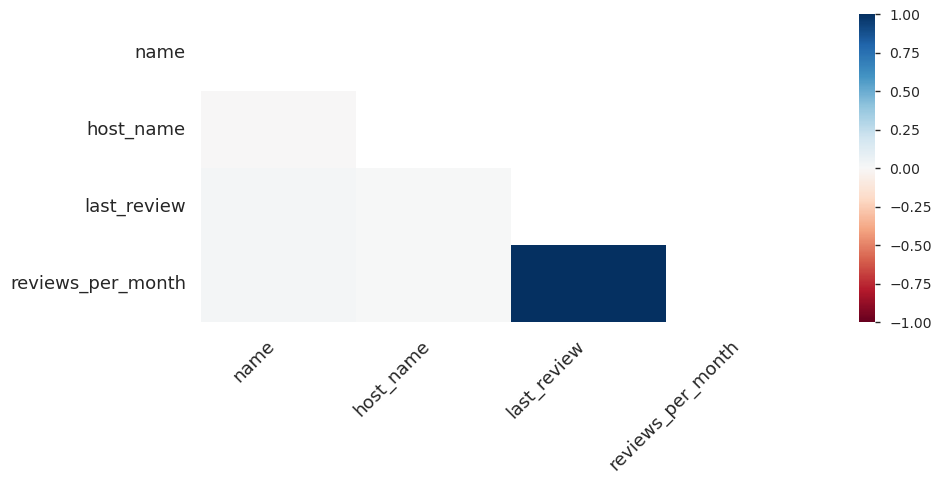

In [3]:
# generate profile
profile = ydata_profiling.ProfileReport(df)

# load profile into widget
profile.to_widgets()

## Check outliers

We will only check outliers for the price and plot

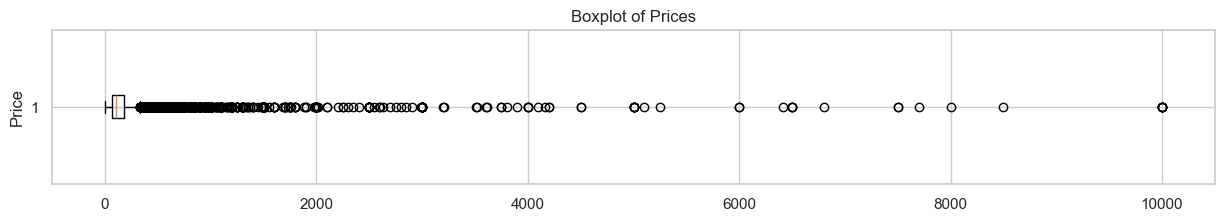

In [4]:
# Set the style of seaborn
sns.set(style="whitegrid")

# set fig size 
plt.figure(figsize=(15, 2))

# Create a boxplot
plt.boxplot(df['price'], vert=False)  

# Adding titles and labels
plt.title('Boxplot of Prices')
plt.ylabel('Price')

# Show the plot
plt.show()

## Drop outliers and replot

In [5]:
# define boundaries
min_price = 10
max_price = 350

# slice out outliers
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()

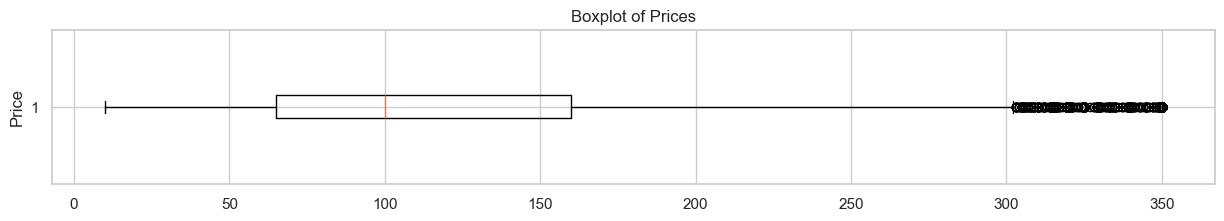

In [6]:
# set fig size 
plt.figure(figsize=(15, 2))

# Create a boxplot
plt.boxplot(df['price'], vert=False)  

# Adding titles and labels
plt.title('Boxplot of Prices')
plt.ylabel('Price')

# Show the plot
plt.show()

In [7]:

# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
# check info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46428 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              46428 non-null  int64         
 1   name                            46413 non-null  object        
 2   host_id                         46428 non-null  int64         
 3   host_name                       46407 non-null  object        
 4   neighbourhood_group             46428 non-null  object        
 5   neighbourhood                   46428 non-null  object        
 6   latitude                        46428 non-null  float64       
 7   longitude                       46428 non-null  float64       
 8   room_type                       46428 non-null  object        
 9   price                           46428 non-null  int64         
 10  minimum_nights                  46428 non-null  int64         
 11  number_

In [10]:
run.finish()